In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Telecom Egypt.csv",index_col=1)

In [3]:
training_set.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS48031C016,742192,10760813.36,346,14.20,14.58,14.20,14.50
1/3/2013 0:00,EGS48031C016,659245,9540410.34,400,14.36,14.54,14.30,14.47
1/6/2013 0:00,EGS48031C016,657748,9532597.93,348,14.35,14.52,14.35,14.49
1/8/2013 0:00,EGS48031C016,762240,11182074.69,538,14.48,14.93,14.32,14.67
1/9/2013 0:00,EGS48031C016,838660,12528344.92,592,14.89,15.11,14.77,14.94


In [4]:
training_set.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/25/2017 0:00,EGS48031C016,3062782,42551770.77,842,13.44,14.03,13.30,13.89
12/26/2017 0:00,EGS48031C016,364077,5028239.36,142,13.80,13.90,13.68,13.81
12/27/2017 0:00,EGS48031C016,610672,8207441.74,242,13.62,13.65,13.36,13.44
12/28/2017 0:00,EGS48031C016,525026,7102266.77,256,13.40,13.68,13.40,13.53
12/31/2017 0:00,EGS48031C016,621441,8337761.07,236,13.51,13.51,13.38,13.42


In [5]:
Telecom_Egypt=training_set[:1198]
Telecom_Egypt.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
11/22/2017 0:00,EGS48031C016,288140,3559136.10,138,12.50,12.50,12.31,12.35
11/23/2017 0:00,EGS48031C016,2066870,26678879.20,855,12.59,13.20,12.51,12.91
11/26/2017 0:00,EGS48031C016,961269,12828802.65,471,12.90,13.70,12.85,13.35
11/27/2017 0:00,EGS48031C016,1280897,17180695.27,442,13.30,13.69,13.05,13.41
11/28/2017 0:00,EGS48031C016,1256678,16976061.11,597,13.64,13.79,13.13,13.51


In [6]:
training_set=Telecom_Egypt.iloc[:,7:8].values

In [7]:
training_set

array([[ 14.5 ],
       [ 14.47],
       [ 14.49],
       ..., 
       [ 13.35],
       [ 13.41],
       [ 13.51]])

In [8]:
len(training_set)

1198

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [11]:
X_train=training_set[0:1197]

In [12]:
y_train=training_set[1:1198]

In [13]:
len(X_train),len(y_train)

(1197, 1197)

In [14]:
X_train=np.reshape(X_train,(1197,1,1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [16]:
regressor=Sequential()

In [17]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [18]:
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
1197/1197 [==============================] - 5s 4ms/step - loss: 0.3549
Epoch 2/150
1197/1197 [==============================] - 0s 221us/step - loss: 0.2681 0s - loss: 0.2
Epoch 3/150
1197/1197 [==============================] - 0s 240us/step - loss: 0.2012
Epoch 4/150
1197/1197 [==============================] - 0s 200us/step - loss: 0.1512
Epoch 5/150
1197/1197 [==============================] - 0s 195us/step - loss: 0.1149
Epoch 6/150
1197/1197 [==============================] - 0s 175us/step - loss: 0.0893
Epoch 7/150
1197/1197 [==============================] - 0s 151us/step - loss: 0.0723
Epoch 8/150
1197/1197 [==============================] - 0s 148us/step - loss: 0.0612
Epoch 9/150
1197/1197 [==============================] - 0s 148us/step - loss: 0.0545
Epoch 10/150
1197/1197 [==============================] - 0s 144us/step - loss: 0.0505
Epoch 11/150
1197/1197 [==============================] - 0s 126us/step - loss: 0.0482
Epoch 12/150
1197/1197 [===============

1197/1197 [==============================] - 0s 85us/step - loss: 4.1040e-04
Epoch 96/150
1197/1197 [==============================] - 0s 96us/step - loss: 3.8907e-04
Epoch 97/150
1197/1197 [==============================] - 0s 84us/step - loss: 3.7190e-04
Epoch 98/150
1197/1197 [==============================] - 0s 84us/step - loss: 3.5782e-04
Epoch 99/150
1197/1197 [==============================] - 0s 87us/step - loss: 3.4585e-04
Epoch 100/150
1197/1197 [==============================] - 0s 86us/step - loss: 3.3685e-04
Epoch 101/150
1197/1197 [==============================] - 0s 91us/step - loss: 3.2983e-04
Epoch 102/150
1197/1197 [==============================] - 0s 84us/step - loss: 3.2496e-04
Epoch 103/150
1197/1197 [==============================] - 0s 84us/step - loss: 3.2013e-04
Epoch 104/150
1197/1197 [==============================] - 0s 87us/step - loss: 3.1707e-04
Epoch 105/150
1197/1197 [==============================] - 0s 84us/step - loss: 3.1432e-04
Epoch 106/150
119

In [21]:
test_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Telecom Egypt 2.csv")

In [22]:
real_stock_price=test_set.iloc[:,7:8].values

In [23]:
inputs=real_stock_price

In [24]:
inputs=sc.transform(inputs)

In [25]:
len(inputs)

21

In [26]:
inputs=np.reshape(inputs,(21,1,1))

In [27]:
predicted_stock_prices=regressor.predict(inputs)

In [28]:
predicted_stock_prices=sc.inverse_transform(predicted_stock_prices)

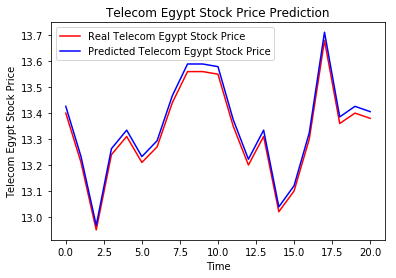

In [29]:
plt.plot(real_stock_price,color='red',label='Real Telecom Egypt Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted Telecom Egypt Stock Price')
plt.title('Telecom Egypt Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Telecom Egypt Stock Price')
plt.legend()
plt.show()

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_prices))
rmse

0.024910700990765314

In [32]:
mse=mean_squared_error(real_stock_price,predicted_stock_prices)
mse

0.00062054302385131609